## 1. Types de données : ?

## - string

## - int

## - float 

## - booleen (True, False)

## 2.  oppérations:  Comment on appelle l'addition de duex strings ?

## - concanténation

## 3. Différence entre comparaison et affectation de variables ?

## - comparaison : "=="

## - Affectation : "="

## 4. La fonction print : fait quoi ?

##- Afficher une variable


# 1. Import usefull libraries



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Load housse price data

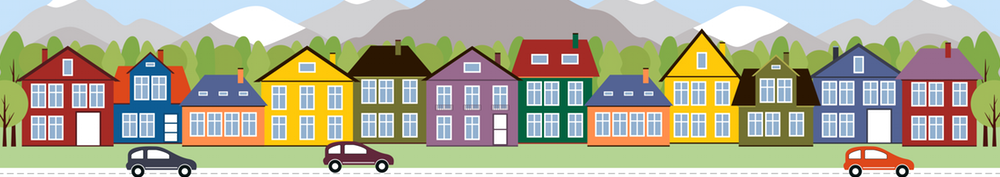

In [ ]:
dataframe = pd.read_csv("train.csv")

In [ ]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Print the 5 frst rows of data

In [ ]:
dataframe.head()

# 4. Checking the types of data

## Question : Quels sont les types de données que vous connaissez ?

In [ ]:
dataframe.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 5. Dropping the duplicate rows

In [ ]:
duplicate_rows_df = dataframe[dataframe.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 81)


In [ ]:
df = dataframe.drop_duplicates()

In [ ]:
df.shape

# 6. Check for Missing Values

In [ ]:
df.isnull().any()

In [ ]:
df.isna().sum()

In [ ]:
# = df.dropna()    # Dropping the missing values.
#df.count()

# 7. Separate Dataframes (depending on data type)

Might be useful when we consider features of different data types

In [ ]:
# CATEGORICAL FEATURES
cat_df=df.select_dtypes(include='object')

In [ ]:
cat_df.shape

(1460, 43)

In [ ]:
cat_df.columns   # list of the categorical columns.

In [ ]:
# NUMERIC FEATURES
num_df=df.select_dtypes(include='number')
num_df.shape

In [ ]:
num_df.columns # list of numeric columns.

In [ ]:
# FEATURES WITH MISSING VALUES

nan_df=df.loc[:, df.isna().any()]
nan_df.shape
nan_df.columns   # list of columns with missing values.

# 8. Most Related Features to the Target



By definition, a correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

In our dataset, it is crucial to have a better understanding of the underlying structure and characteristics of the data and leads to better intuition in knowing whether some pairs of attributes are correlated and how much. For many ML algorithms correlated features might make some trouble, ideally we should try to get a set of independent features.


## Person correlation



Pearson correlation coefficient

One of the simplest method for understanding a feature’s relation to the response variable is Pearson correlation coefficient, which measures linear correlation between two variables. The resulting value lies in [-1;1], with -1 meaning perfect negative correlation (as one variable increases, the other decreases), +1 meaning perfect positive correlation and 0 meaning no linear correlation between the two variables.


In [ ]:
cor_mat= df[:].corr()### par defaut : method='pearson'
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [ ]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice


# INFERENCES--

   1.  Note that some of the features have quite high corelation with the target. These features are really significant.

    2. Of these the features with corelation value >0.5 are really important. Some features like GrLivArea etc.. are even more important.

 
   3.  We will consider these features (i.e. GrLivArea,OverallQual) etc.. in more detail in subsequent sections during univariate and bivariate analysis.



In [ ]:
df_cor = pd.DataFrame(cor_with_tar.SalePrice)
df_cor.reset_index(level=0, inplace=True)

In [ ]:
higth_cor = list(df_cor[(df_cor['SalePrice'] >=0.5)]['index'])

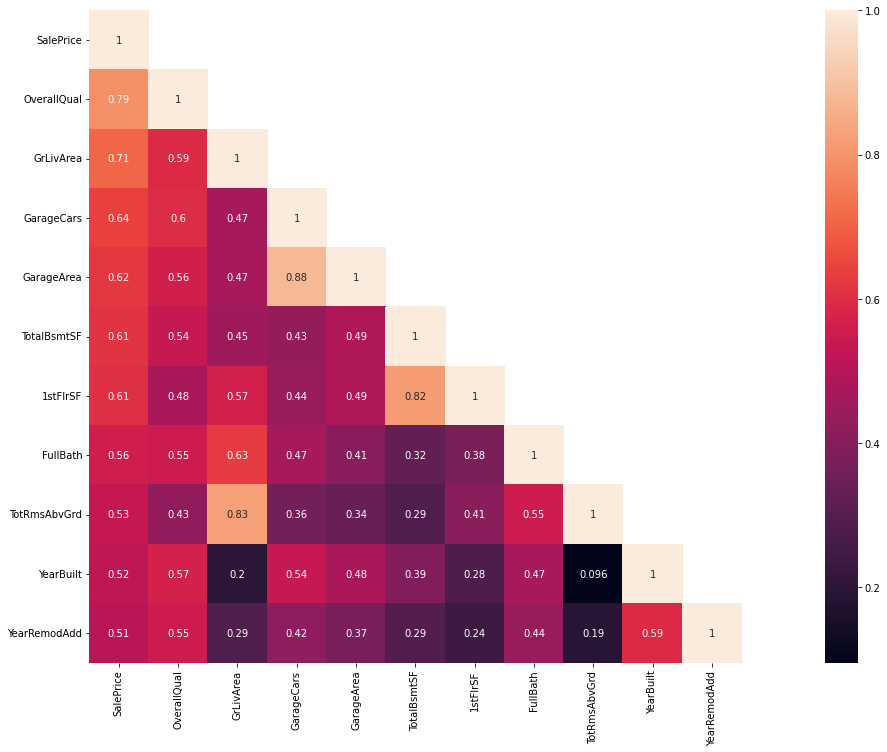

In [ ]:
# using a corelation map to visualize features with high corelation.
#cor_mat= df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
            # 'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()
cor_mat= df[higth_cor].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

# 9. It would also be interesting to understand strong correlations between attribute pairs.


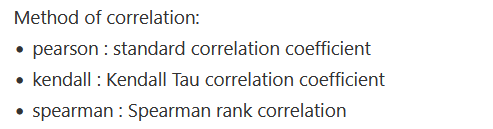

In [ ]:
pearson = df.corr(method='pearson')

In [ ]:
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {(YearBuilt, YearRemodAdd): 0.592855, (1stFlrSF, GrLivArea): 0.566024, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair                   correlation
# 0     (OverallQual, TotalBsmtSF)     0.537808
# 1     (GarageArea, GarageCars)	   0.882475
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['Attribute Pair', 'Correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[
                                                   abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
20,"(GarageArea, GarageCars)",0.882475
22,"(GarageYrBlt, YearBuilt)",0.825667
9,"(GrLivArea, TotRmsAbvGrd)",0.825489
0,"(1stFlrSF, TotalBsmtSF)",0.819530
6,"(2ndFlrSF, GrLivArea)",0.687501
18,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
5,"(BsmtFinSF1, BsmtFullBath)",0.649212
3,"(GarageYrBlt, YearRemodAdd)",0.642277
17,"(FullBath, GrLivArea)",0.630012
15,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


https://www.kaggle.com/hakabuk/python-data-exploration

In [ ]:
import subprocess
import webbrowser
import sys

url = 'http://test.com'
if sys.platform == 'darwin':    # in case of OS X
    subprocess.Popen(['open', url])
else:
    webbrowser.open_new_tab(url)